[{'status': 'ok', 'totalResults': 23701, 'articles': [{'source': {'id': None, 'name': 'New York Times'}, 'author': 'Joseph Berger', 'title': 'Rabbi Chaim Kanievsky, Venerated Talmudic Scholar, Dies at 94', 'description': 'He initially insisted, “Canceling Torah study is more dangerous than the coronavirus.” But he had a change of heart, even before testing positive.', 'url': 'https://www.nytimes.com/2022/03/18/obituaries/rabbi-chaim-kanievsky-dea.html', 'urlToImage': 'https://static01.nyt.com/images/2022/03/19/obituaries/19Kanievsky-obit1/00Kanievsky1-facebookJumbo.jpg', 'publishedAt': '2022-03-18T20:26:55Z', 'content': 'Most significant was his ruling that instances of sexual abuse of children should be reported to the civic authorities and not handled exclusively within the Haredi community. This was a sharp depart… [+1849 chars]'}, {'source': {'id': None, 'name': 'New York Times'}, 'author': 'Emma G. Fitzsimmons', 'title': 'Can Eric Adams Cheerlead New Yorkers Past the Pandemic?', '

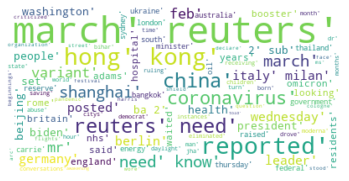

In [ ]:
import spacy
from newsapi.newsapi_client import NewsApiClient
import en_core_web_lg

nlp = en_core_web_lg.load()
newsapi = NewsApiClient(api_key='1b09fdc9ec3e4e3e93bb7856ed787dd1')


def getSomething(x):
    temp = newsapi.get_everything(q='coronavirus', language='en',
                                  from_param='2022-02-23', to='2022-03-23',
                                  sort_by='relevancy', page=x)
    return temp


articles = list(map(getSomething, range(1, 6)))
print(articles)

import pandas as pd

dados = []

for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        description = x['description']
        content = x['content']
        dados.append({'title': title, 'desc': description, 'content': content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

from collections import Counter
from string import punctuation

results = []


def get_keywords_eng(text):
    result = []
    pos_tag = ['PROPN', 'VERB', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        if (token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if (token.pos_ in pos_tag):
            result.append(token.text)
    print(result)
    return result


for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(results)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()